In [184]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
plt.style.use('default')
rcParams['figure.figsize'] = 10, 6

import missingno as msno
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import scikitplot as skplt
from datetime import date, datetime, timedelta

In [226]:
pip install --upgrade pip

     |████████████████████████████████| 1.4MB 1.7MB/s eta 0:00:01
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
Note: you may need to restart the kernel to use updated packages.


### Libraries

In [228]:
#Model Libraries Below
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans, SpectralClustering

#Preprocessing Tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Model evalutaion and Vizualization tools
from sklearn.metrics import mean_squared_error
import scikitplot as skplt
from collections import Counter
from yellowbrick.model_selection import RFECV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE, SelectKBest, SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from yellowbrick.classifier import classification_report as conf_matrix
from sklearn.metrics import classification_report
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier import class_prediction_error
from imblearn.under_sampling import NearMiss

### Important Functions

In [229]:
def print_coefs(model, model_name = 'Linear Reg', num_feat = 15,  plot_title = 'Predictive Metrics Importance', x_lab = 'Predictive Features', y_lab = 'Coefficient Size', rotation = 90):
    coefs = model.coef_[0]
    varias = X.columns
    plt.figure(figsize = (14,8))
    plt.title(plot_title + '({})'.format(model_name), fontsize = 24, color = "#535355")
    plt.xlabel(x_lab, fontsize = 18, color = "#050594")
    plt.ylabel(y_lab, fontsize = 18, color = "#050594")
    plt.xticks(rotation=rotation)
    pd.Series(coefs, index=varias).nlargest(num_feat).plot(kind='bar')
    plt.savefig(model_name, bbox_inches = 'tight')
    plt.show

### Import Pandas DFs

In [127]:
normal_df = pd.read_csv('normal_df_reduced.csv')
normal_df = normal_df.set_index('Household Key')
normal_df.head()

,Mail Responder,Motorcycle Indicator,Income,Credit Ranges,age,Number of Children,Num Vehicles Owned,FSV Services Purchased,Home Owner_Probable Home Owner,Home Owner_Probable Renter,...,Education_Graduated School,Education_High School,Education_Some College,Education_Unknown,Education_nan,Gender_Male,Gender_Unknown,Gender_nan,Bought FSV,Total Cost
Household Key,,,,,,,,,,,,,,,,,,,,,
969.0,1,1,95.000000,708.333333,75.500000,0.0,2,0,0,0,...,0,1,0,0,0,1,0,0,0,226.10
3338.0,1,0,15.000000,675.000000,89.000000,1.0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0.00
8718.0,1,0,55.000000,737.500000,68.000000,0.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0.00
11524.0,1,1,157.857143,753.571429,49.000000,2.0,3,0,0,0,...,0,0,1,0,0,1,0,0,0,294.25
13422.0,1,1,95.000000,668.750000,69.333333,0.0,2,0,0,0,...,1,0,0,0,0,0,0,0,0,118.85


In [128]:
scaled_df = pd.read_csv('scaled_df_reduced.csv')
scaled_df = scaled_df.set_index('Household Key')
scaled_df.head()

,Mail Responder,Motorcycle Indicator,Income,Credit Ranges,age,Number of Children,Num Vehicles Owned,FSV Services Purchased,Home Owner_Probable Home Owner,Home Owner_Probable Renter,...,Education_Graduated School,Education_High School,Education_Some College,Education_Unknown,Education_nan,Gender_Male,Gender_Unknown,Gender_nan,Bought FSV,Total Cost
Household Key,,,,,,,,,,,,,,,,,,,,,
969,1,1,0.354167,0.612403,0.685897,0.000000,0.095238,0.0,0,0,...,0,1,0,0,0,1,0,0,0,226.10
3338,1,0,0.020833,0.501661,0.858974,0.166667,0.000000,0.0,0,0,...,0,0,0,1,0,0,0,1,0,0.00
8718,1,0,0.187500,0.709302,0.589744,0.000000,0.000000,0.0,0,0,...,0,0,1,0,0,1,0,0,0,0.00
11524,1,1,0.616071,0.762696,0.346154,0.333333,0.142857,0.0,0,0,...,0,0,1,0,0,1,0,0,0,294.25
13422,1,1,0.354167,0.480897,0.606838,0.000000,0.095238,0.0,0,0,...,1,0,0,0,0,0,0,0,0,118.85


In [129]:
scaled_df['Bought FSV'].value_counts()

0    2408
1     865
Name: Bought FSV, dtype: int64

### Define X_train, X_test

##### - Change Model Here from scaled to not scaled

In [188]:
###Define which df you will be using 

model_df = normal_df

X = model_df.drop(columns = ['Bought FSV', 'FSV Services Purchased'], axis = 1)
y = model_df['Bought FSV']

#Split Train Test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 18)

#Instantiate Models
logreg = LogisticRegression()
forest = RandomForestClassifier()
knn = KNeighborsClassifier()

#Fit Data To Models
logreg.fit(X_train, y_train)
forest.fit(X_train, y_train)
knn.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

<function matplotlib.pyplot.show(*args, **kw)>

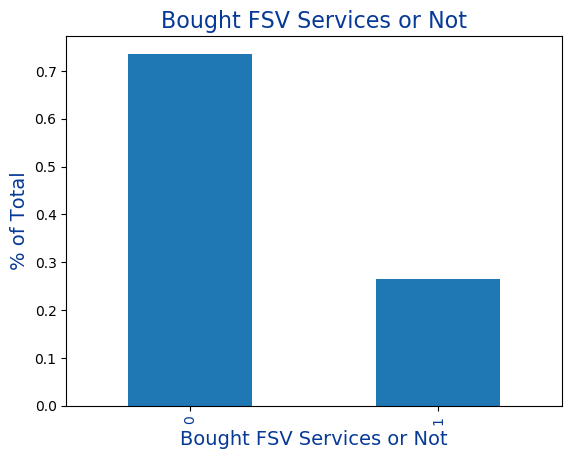

In [131]:
#Define Params
plt.title('Bought FSV Services or Not', fontsize = 16, color = '#073997')
plt.xlabel('Bought FSV Services or Not', fontsize = 14, color = '#073997')
plt.ylabel('% of Total', fontsize = 14, color = '#073997')
plt.xticks(fontsize =10, color = '#073997')

#Plot Figure
y.value_counts(normalize = True).plot(kind = 'bar')
plt.savefig('Bought FSV Class Imabalnce', bbox_inches = 'tight')
plt.show

### Logistic Classification Report

In [189]:
y_true = y_test
y_pred = logreg.predict(X_test)
target_names = [1,0]
print(classification_report(y_true, y_pred, target_names))

              precision    recall  f1-score   support

           1       0.50      0.01      0.01       161
           0       0.75      1.00      0.86       494

    accuracy                           0.75       655
   macro avg       0.63      0.50      0.44       655
weighted avg       0.69      0.75      0.65       655



/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


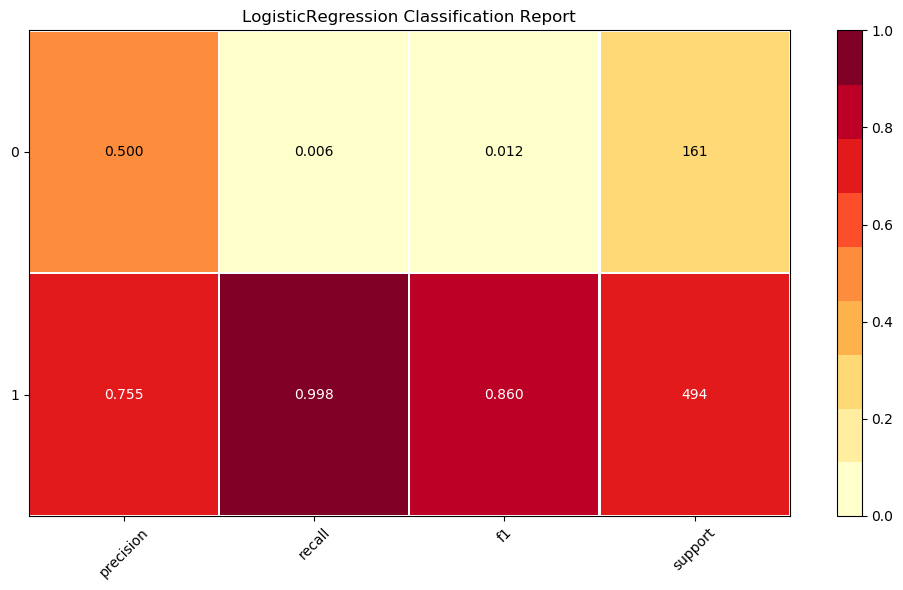

In [190]:
# Instantiate the visualizer
classes = [1, 0]
visualizer = conf_matrix(logreg, X_train, y_train, X_test, y_test, classes = classes, support=True)

### Write FUnction to Plot AUC Curve

In [191]:
def plot_curve(model):
    skplt.metrics.plot_cumulative_gain(y_test, model.predict_proba(X_test))

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


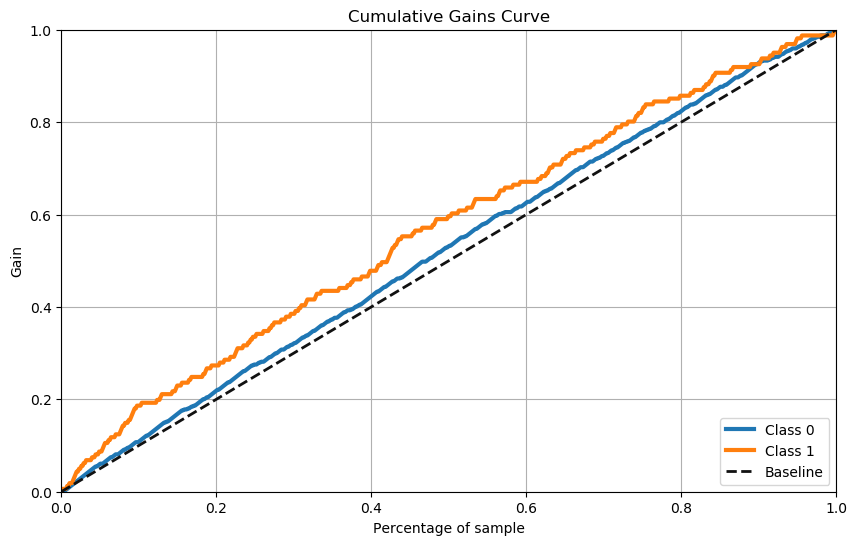

In [192]:
plot_curve(logreg)

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


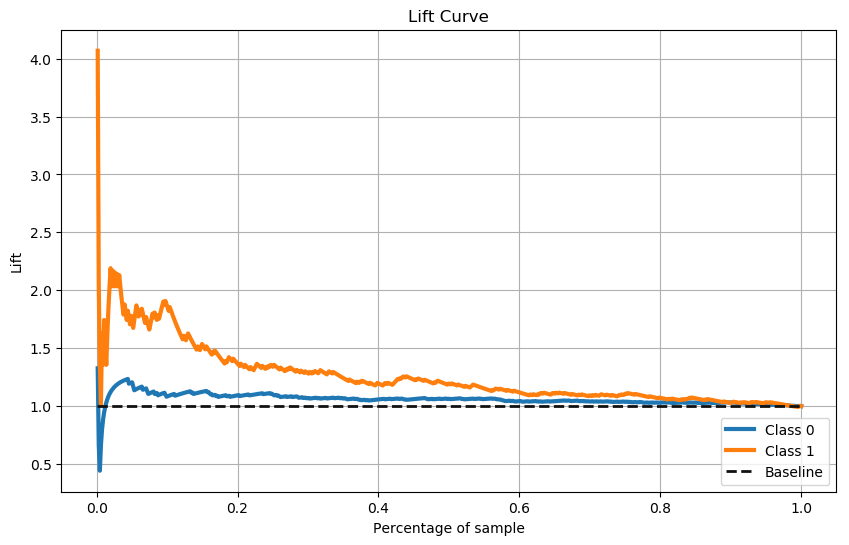

In [193]:
skplt.metrics.plot_lift_curve(y_test, logreg.predict_proba(X_test))

/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


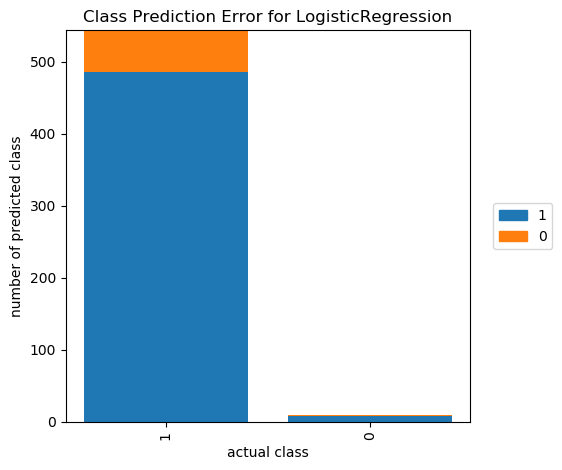

/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ClassPredictionError(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c4c9e2c50>,
                     classes=[1, 0], encoder=None, force_model=False,
                     is_fitted='auto', model=None)

In [110]:
class_prediction_error(logreg, X_train, y_train, X_test, y_test, classes=[1, 0])

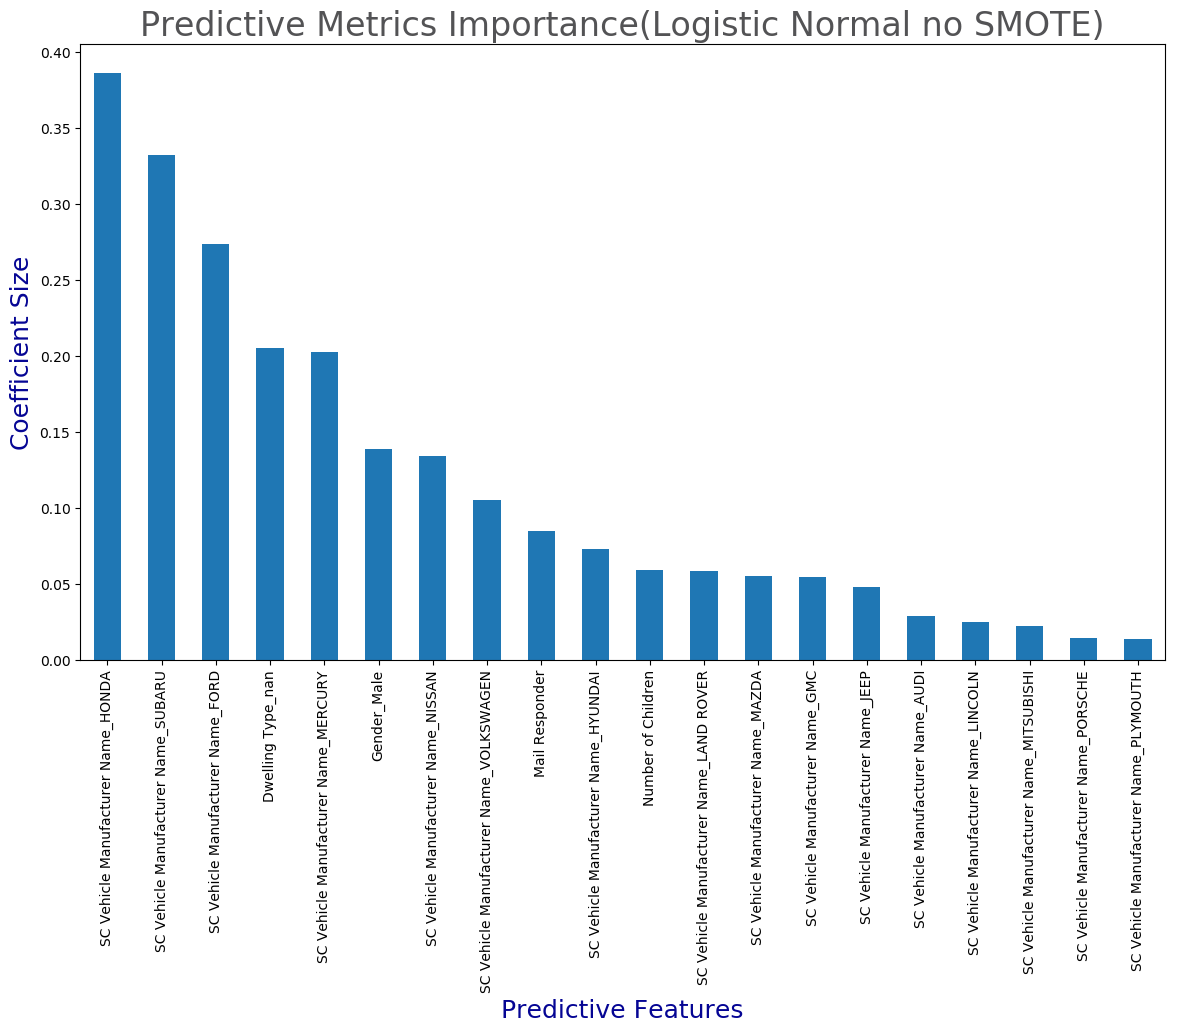

In [195]:
print_coefs(logreg, "Logistic Normal no SMOTE", num_feat=20)

### Use SMOTE to Treat Class Imbalance

In [196]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
logreg.fit(X_train, y_train)
np.bincount(y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([1914, 1914])

In [197]:
logreg.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [198]:
y_true = y_test
y_pred = logreg.predict(X_test)
target_names = [1,0]
print(classification_report(y_true, y_pred, target_names))

              precision    recall  f1-score   support

           1       0.30      0.32      0.31       161
           0       0.77      0.76      0.77       494

    accuracy                           0.65       655
   macro avg       0.54      0.54      0.54       655
weighted avg       0.66      0.65      0.65       655



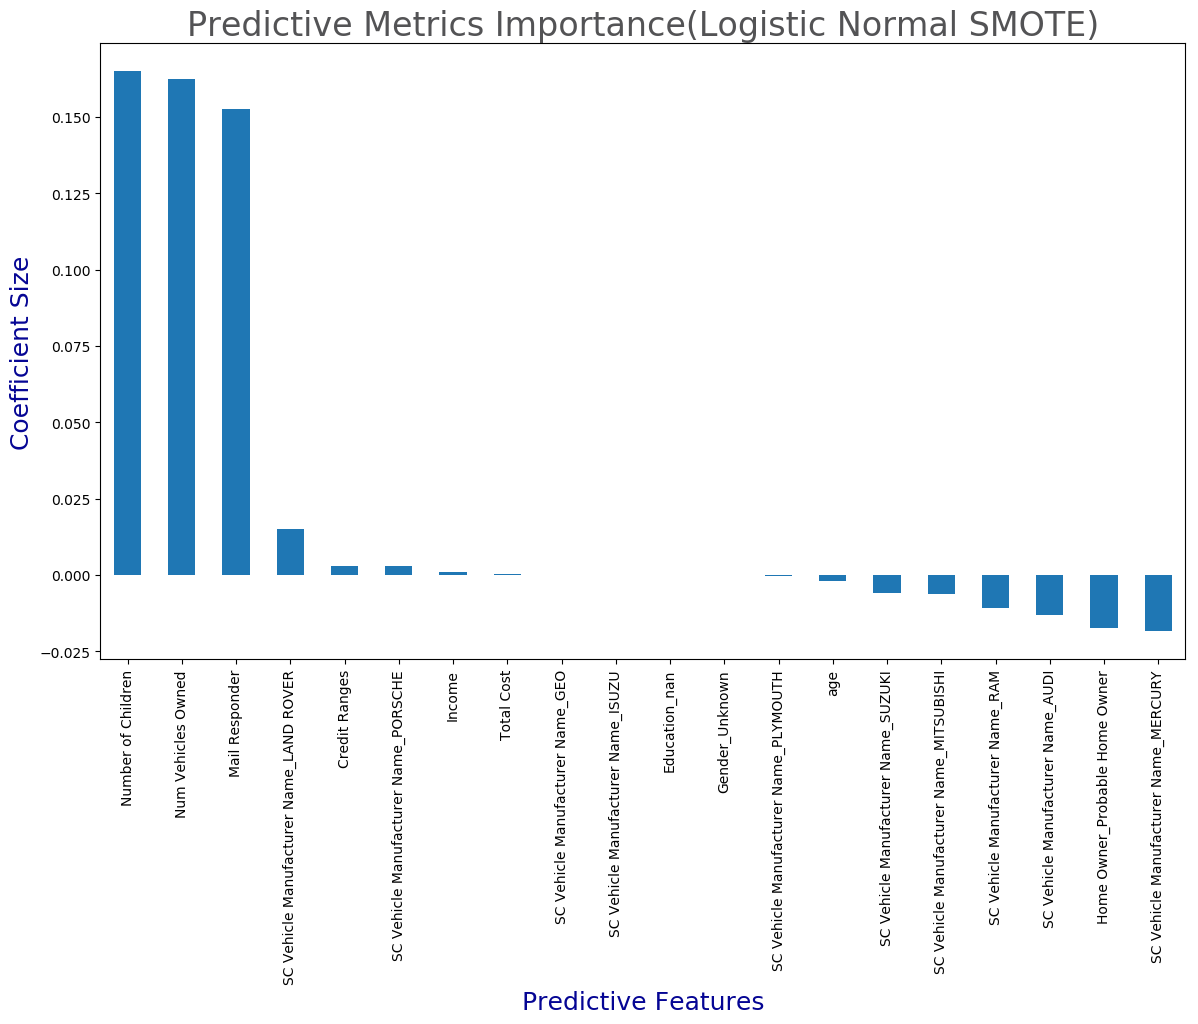

In [199]:
print_coefs(logreg, "Logistic Normal SMOTE", num_feat=20)

## Try Downsample

In [200]:
X = normal_df.drop(columns = ['Bought FSV', 'FSV Services Purchased'], axis = 1)
y = normal_df['Bought FSV']

#Split Train Test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 18)

In [201]:
from imblearn.under_sampling import NearMiss
nr = NearMiss()
X_train, y_train = nr.fit_sample(X_train, y_train)
logreg.fit(X_train, y_train)
np.bincount(y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([704, 704])

In [202]:
y_true = y_test
y_pred = logreg.predict(X_test)
target_names = [1,0]
print(classification_report(y_true, y_pred, target_names))

              precision    recall  f1-score   support

           1       0.30      0.65      0.41       161
           0       0.81      0.50      0.62       494

    accuracy                           0.53       655
   macro avg       0.55      0.57      0.51       655
weighted avg       0.68      0.53      0.57       655



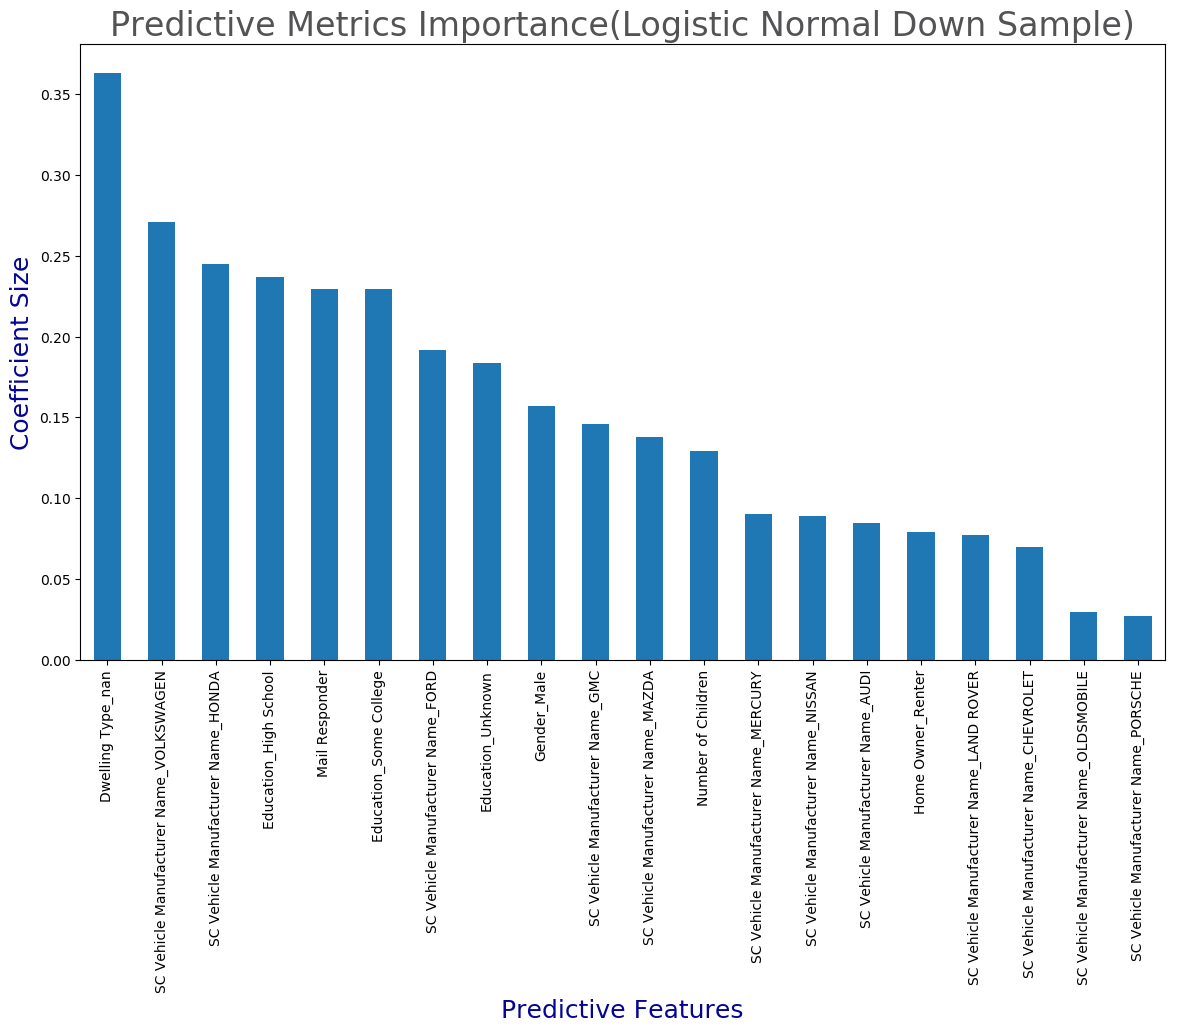

In [203]:
print_coefs(logreg, "Logistic Normal Down Sample", num_feat=20)

### Try Random Forest

In [204]:
model_df = normal_df

X = model_df.drop(columns = ['Bought FSV', 'FSV Services Purchased'], axis = 1)
y = model_df['Bought FSV']

#Split Train Test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 18)

#Instantiate Models
forest = RandomForestClassifier()

#Fit Data To Models
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [205]:
y_true = y_test
y_pred = forest.predict(X_test)
target_names = [1,0]
print(classification_report(y_true, y_pred, target_names))

              precision    recall  f1-score   support

           1       0.39      0.04      0.08       161
           0       0.76      0.98      0.85       494

    accuracy                           0.75       655
   macro avg       0.57      0.51      0.47       655
weighted avg       0.67      0.75      0.66       655



/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


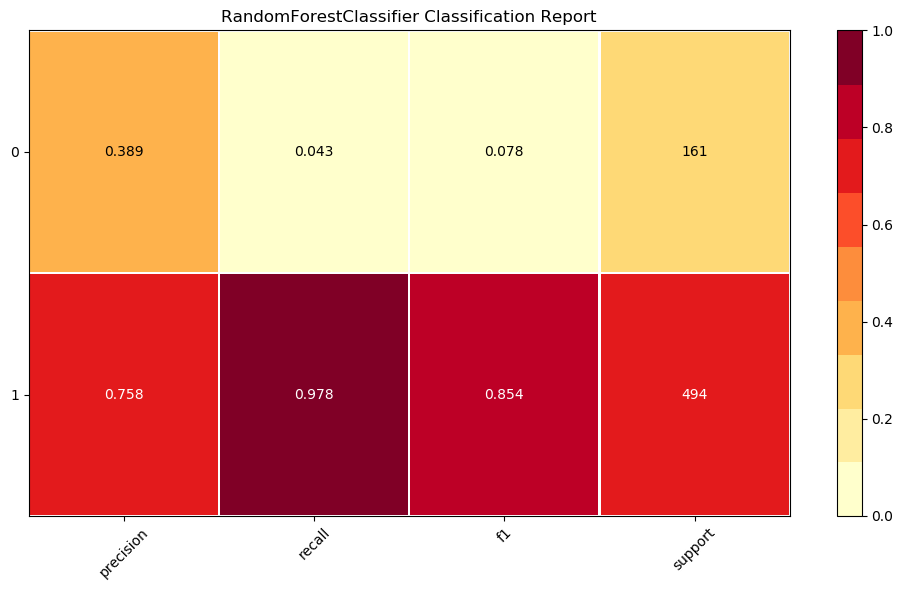

In [206]:
# Instantiate the visualizer
classes = [1, 0]
visualizer = conf_matrix(forest, X_train, y_train, X_test, y_test, classes = classes, support=True)

<function matplotlib.pyplot.show(*args, **kw)>

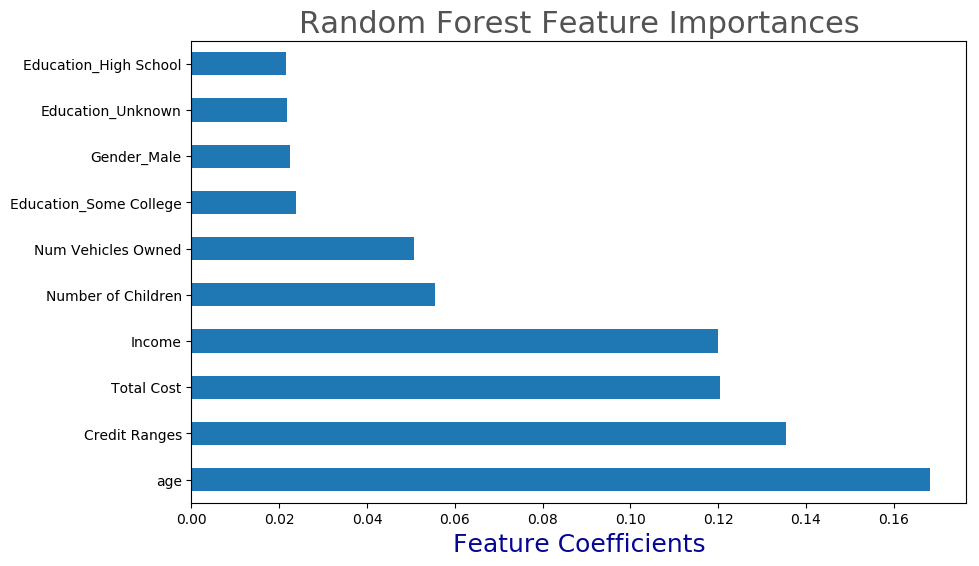

In [208]:
plt.figure(figsize = (10,6))
plt.title('Random Forest Feature Importances', fontsize = 22, color = "#535355")
plt.xlabel('Feature Coefficients', fontsize = 18, color = "#050594")
# plt.ylabel('Feature Name', fontsize = 18, color = "#050594")
# plt.xticks(rotation=rotation)
pd.Series(forest.feature_importances_, index=X.columns).nlargest(10).plot(kind='barh')
plt.savefig('Random Forest Normal Features', bbox_inches = 'tight')
plt.show

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


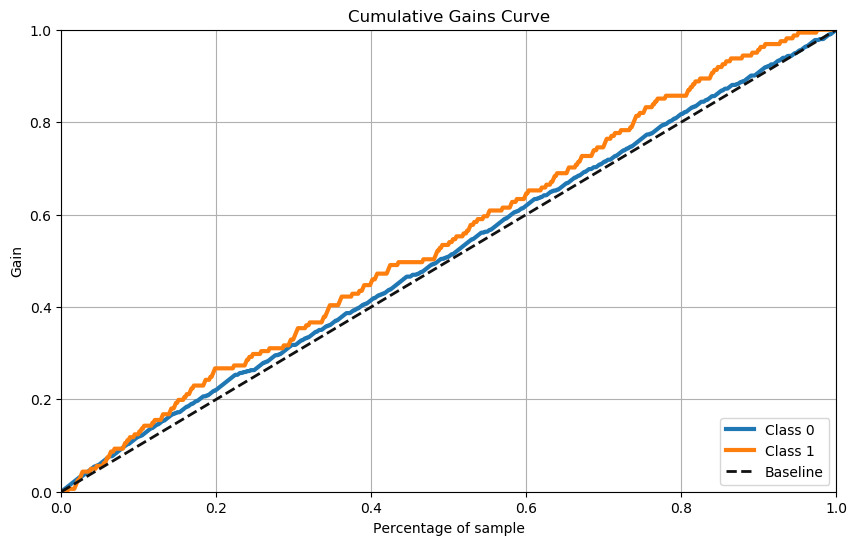

In [209]:
plot_curve(forest)

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


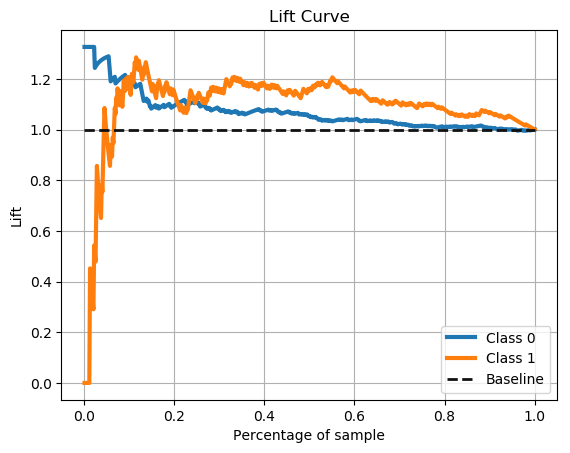

In [177]:
skplt.metrics.plot_lift_curve(y_test, forest.predict_proba(X_test))

/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


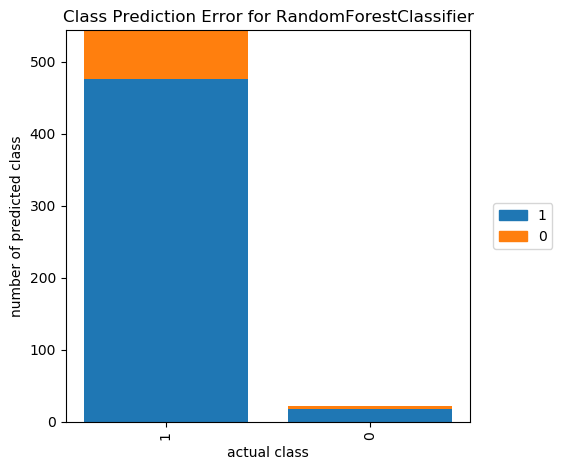

/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ClassPredictionError(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c4c5b5cc0>,
                     classes=[1, 0], encoder=None, force_model=False,
                     is_fitted='auto', model=None)

In [178]:
class_prediction_error(forest, X_train, y_train, X_test, y_test, classes=[1, 0])

### Smote

In [179]:
#SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
forest.fit(X_train, y_train)
np.bincount(y_train)

array([1914, 1914])

In [180]:
y_true = y_test
y_pred = forest.predict(X_test)
target_names = [1, 0]
print(classification_report(y_true, y_pred, target_names))

              precision    recall  f1-score   support

           1       0.32      0.20      0.24       161
           0       0.77      0.86      0.81       494

    accuracy                           0.70       655
   macro avg       0.54      0.53      0.53       655
weighted avg       0.66      0.70      0.67       655



/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


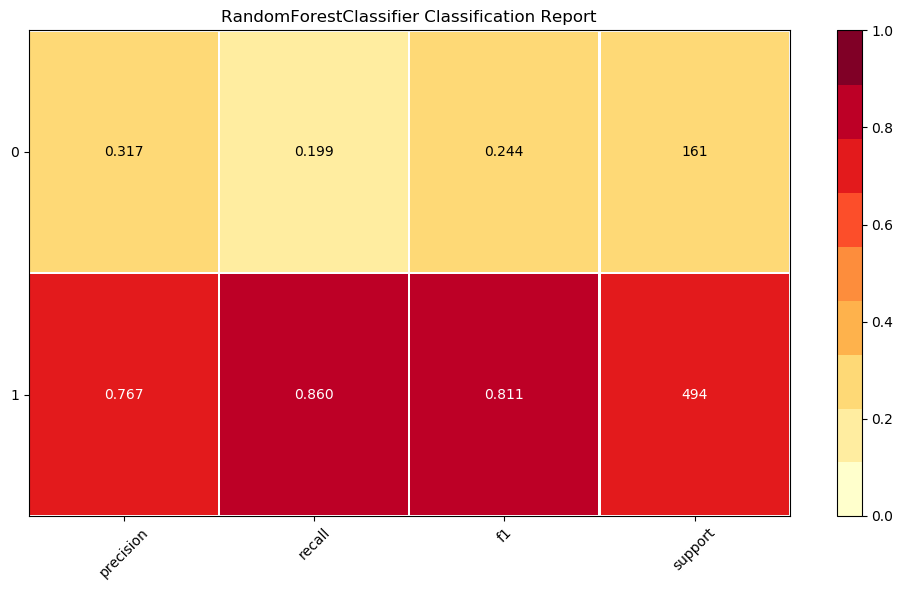

In [187]:
# Instantiate the visualizer
classes = [1, 0]
visualizer = conf_matrix(forest, X_train, y_train, X_test, y_test, classes = classes, support=True)

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


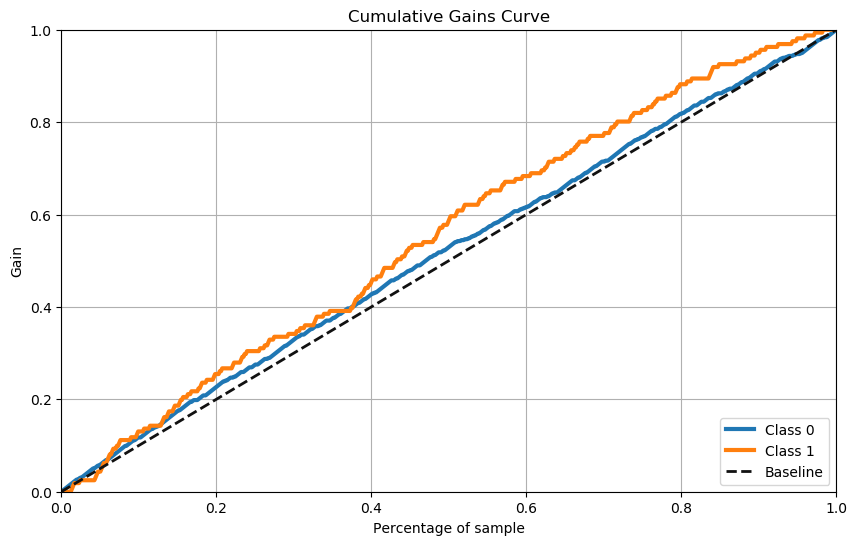

In [186]:
plot_curve(forest)

<function matplotlib.pyplot.show(*args, **kw)>

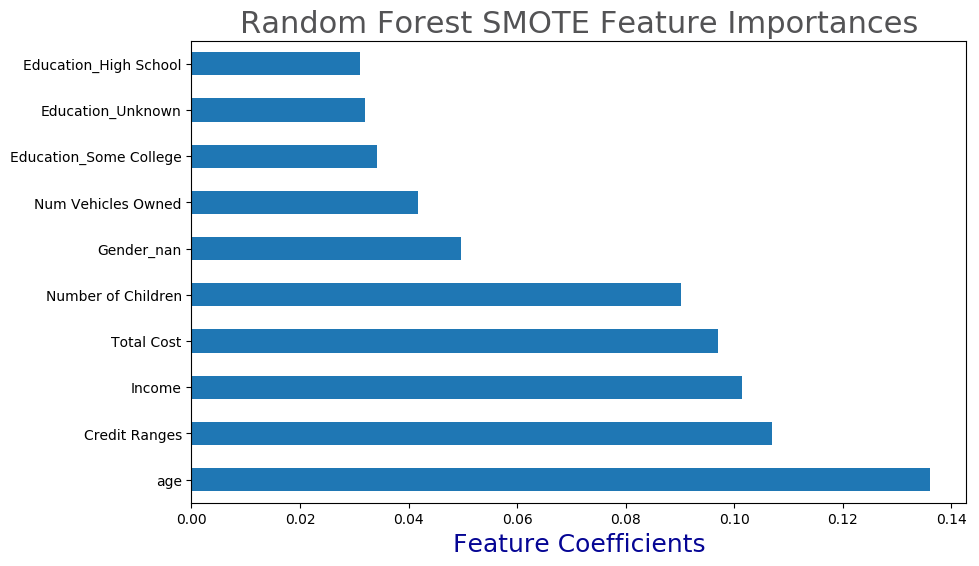

In [185]:
plt.figure(figsize = (10,6))
plt.title('Random Forest SMOTE Feature Importances', fontsize = 22, color = "#535355")
plt.xlabel('Feature Coefficients', fontsize = 18, color = "#050594")
# plt.ylabel('Feature Name', fontsize = 18, color = "#050594")
# plt.xticks(rotation=rotation)
pd.Series(forest.feature_importances_, index=X.columns).nlargest(10).plot(kind='barh')
plt.savefig('Random Forest Smote Features', bbox_inches = 'tight')
plt.show

In [212]:
from imblearn.under_sampling import NearMiss

model_df = normal_df

X = model_df.drop(columns = ['Bought FSV', 'FSV Services Purchased'], axis = 1)
y = model_df['Bought FSV']

#Split Train Test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 18)

nr = NearMiss()
X_train, y_train = nr.fit_sample(X_train, y_train)
np.bincount(y_train)

array([704, 704])

In [213]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [214]:
y_true = y_test
y_pred = forest.predict(X_test)
target_names = [1, 0]
print(classification_report(y_true, y_pred, target_names))

              precision    recall  f1-score   support

           1       0.27      0.66      0.38       161
           0       0.79      0.41      0.54       494

    accuracy                           0.47       655
   macro avg       0.53      0.53      0.46       655
weighted avg       0.66      0.47      0.50       655



/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


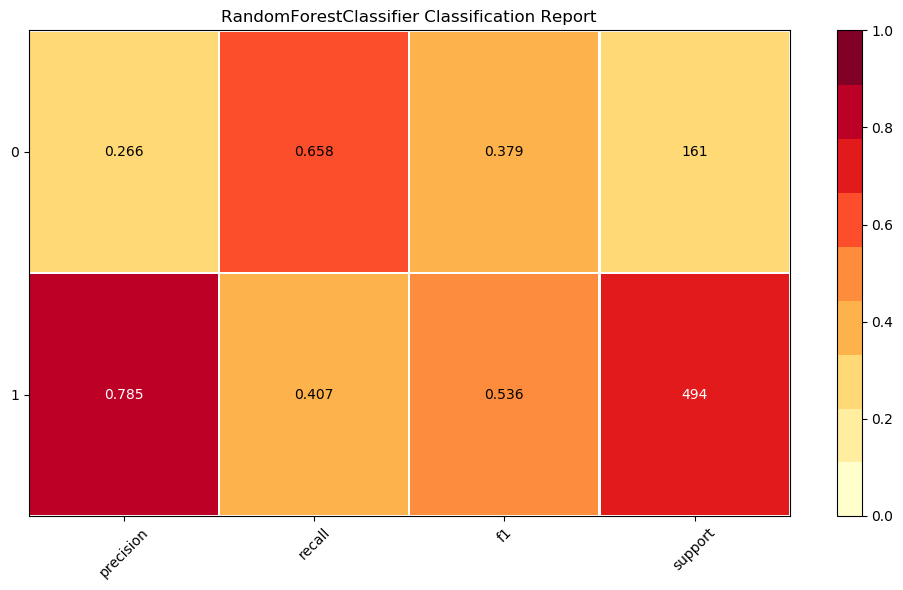

In [215]:
# Instantiate the visualizer
classes = [1, 0]
visualizer = conf_matrix(forest, X_train, y_train, X_test, y_test, classes = classes, support=True)

<function matplotlib.pyplot.show(*args, **kw)>

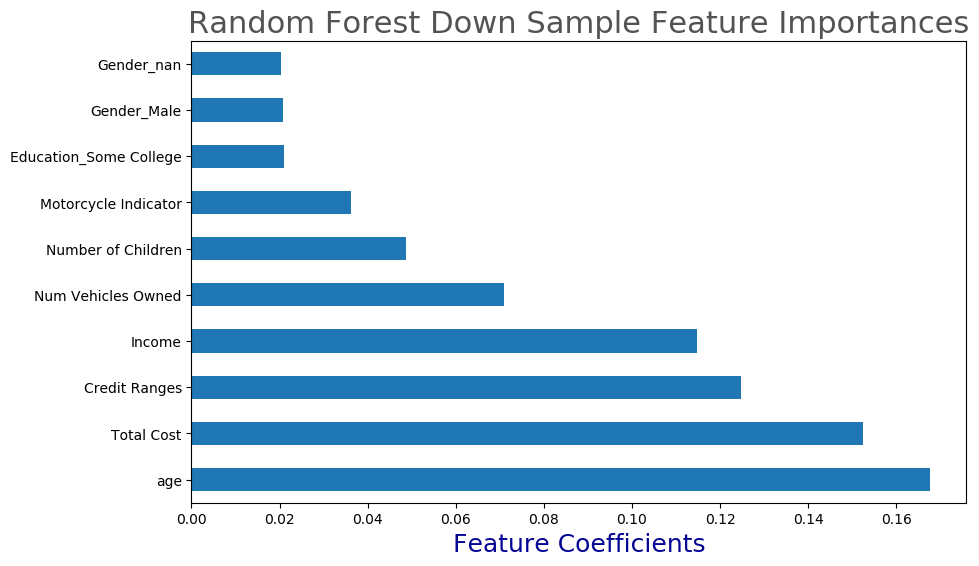

In [216]:
plt.title('Random Forest Down Sample Feature Importances', fontsize = 22, color = "#535355")
plt.xlabel('Feature Coefficients', fontsize = 18, color = "#050594")
# plt.ylabel('Feature Name', fontsize = 18, color = "#050594")
# plt.xticks(rotation=rotation)
pd.Series(forest.feature_importances_, index=X.columns).nlargest(10).plot(kind='barh')
plt.savefig('Random Forest Down Sample Features', bbox_inches = 'tight')
plt.show

## KNN - normal

In [217]:
model_df = normal_df

X = model_df.drop(columns = ['Bought FSV', 'FSV Services Purchased'], axis = 1)
y = model_df['Bought FSV']

#Split Train Test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 18)

#Instantiate Models
knn = KNeighborsClassifier()

#Fit Data To Models
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [218]:
y_true = y_test
y_pred = knn.predict(X_test)
target_names = [1, 0]
print(classification_report(y_true, y_pred, target_names))

              precision    recall  f1-score   support

           1       0.32      0.14      0.20       161
           0       0.76      0.90      0.83       494

    accuracy                           0.71       655
   macro avg       0.54      0.52      0.51       655
weighted avg       0.65      0.71      0.67       655



/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


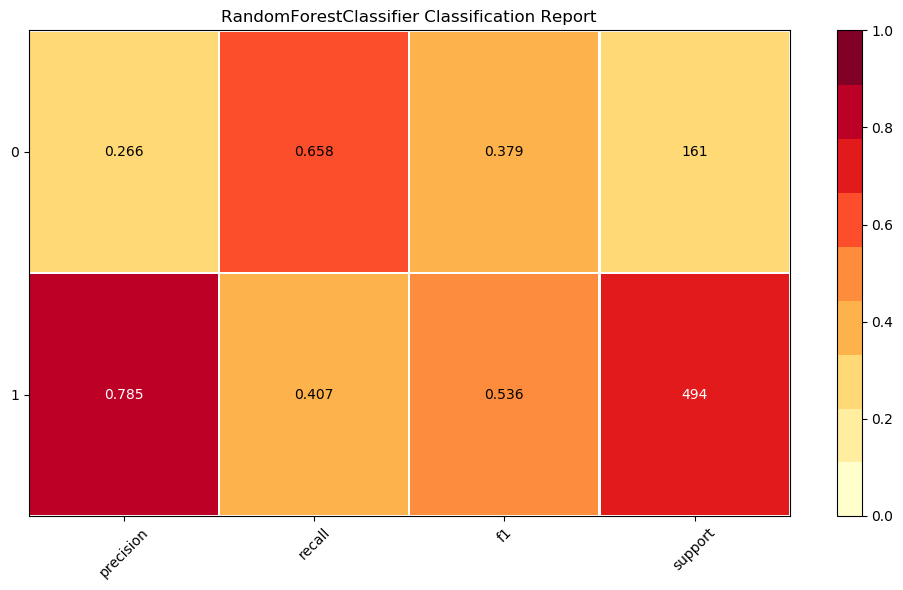

In [219]:
# Instantiate the visualizer
classes = [1, 0]
visualizer = conf_matrix(forest, X_train, y_train, X_test, y_test, classes = classes, support=True)

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


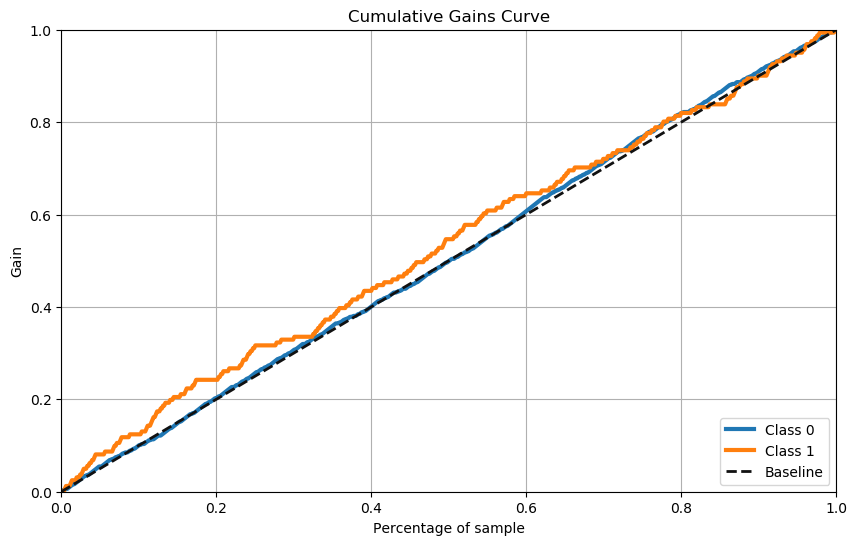

In [220]:
plot_curve(knn)

### Reduce to Smallest DF

In [230]:
manuf= [item for item in normal_df.columns if 'Manufactu' in item]
normal_df = normal_df.drop(columns = manuf)
normal_df.head()

,Mail Responder,Motorcycle Indicator,Income,Credit Ranges,age,Number of Children,Num Vehicles Owned,FSV Services Purchased,Home Owner_Probable Home Owner,Home Owner_Probable Renter,...,Education_Graduated School,Education_High School,Education_Some College,Education_Unknown,Education_nan,Gender_Male,Gender_Unknown,Gender_nan,Bought FSV,Total Cost
Household Key,,,,,,,,,,,,,,,,,,,,,
969.0,1,1,95.000000,708.333333,75.500000,0.0,2,0,0,0,...,0,1,0,0,0,1,0,0,0,226.10
3338.0,1,0,15.000000,675.000000,89.000000,1.0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0.00
8718.0,1,0,55.000000,737.500000,68.000000,0.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0.00
11524.0,1,1,157.857143,753.571429,49.000000,2.0,3,0,0,0,...,0,0,1,0,0,1,0,0,0,294.25
13422.0,1,1,95.000000,668.750000,69.333333,0.0,2,0,0,0,...,1,0,0,0,0,0,0,0,0,118.85


In [231]:
manuf= [item for item in scaled_df.columns if 'Manufactu' in item]
scaled_df = scaled_df.drop(columns = manuf)
scaled_df.head()

,Mail Responder,Motorcycle Indicator,Income,Credit Ranges,age,Number of Children,Num Vehicles Owned,FSV Services Purchased,Home Owner_Probable Home Owner,Home Owner_Probable Renter,...,Education_Graduated School,Education_High School,Education_Some College,Education_Unknown,Education_nan,Gender_Male,Gender_Unknown,Gender_nan,Bought FSV,Total Cost
Household Key,,,,,,,,,,,,,,,,,,,,,
969,1,1,0.354167,0.612403,0.685897,0.000000,0.095238,0.0,0,0,...,0,1,0,0,0,1,0,0,0,226.10
3338,1,0,0.020833,0.501661,0.858974,0.166667,0.000000,0.0,0,0,...,0,0,0,1,0,0,0,1,0,0.00
8718,1,0,0.187500,0.709302,0.589744,0.000000,0.000000,0.0,0,0,...,0,0,1,0,0,1,0,0,0,0.00
11524,1,1,0.616071,0.762696,0.346154,0.333333,0.142857,0.0,0,0,...,0,0,1,0,0,1,0,0,0,294.25
13422,1,1,0.354167,0.480897,0.606838,0.000000,0.095238,0.0,0,0,...,1,0,0,0,0,0,0,0,0,118.85


In [232]:
normal_df.to_csv('normal_df_smallest.csv')
scaled_df.to_csv('scaled_df_smallest.csv')

### Try Logistic and random Forest with new df

In [233]:
model_df = normal_df

X = model_df.drop(columns = ['Bought FSV', 'FSV Services Purchased'], axis = 1)
y = model_df['Bought FSV']

#Split Train Test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 18)

#Instantiate Models
logreg = LogisticRegression()
forest = RandomForestClassifier()

#Fit Data To Models
logreg.fit(X_train, y_train)
forest.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [234]:
y_true = y_test
y_pred = logreg.predict(X_test)
target_names = [1,0]
print(classification_report(y_true, y_pred, target_names))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       161
           0       0.75      1.00      0.86       494

    accuracy                           0.75       655
   macro avg       0.38      0.50      0.43       655
weighted avg       0.57      0.75      0.65       655



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [235]:
y_true = y_test
y_pred = forest.predict(X_test)
target_names = [1,0]
print(classification_report(y_true, y_pred, target_names))

              precision    recall  f1-score   support

           1       0.34      0.07      0.12       161
           0       0.76      0.95      0.85       494

    accuracy                           0.74       655
   macro avg       0.55      0.51      0.48       655
weighted avg       0.66      0.74      0.67       655



### Logistic

/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


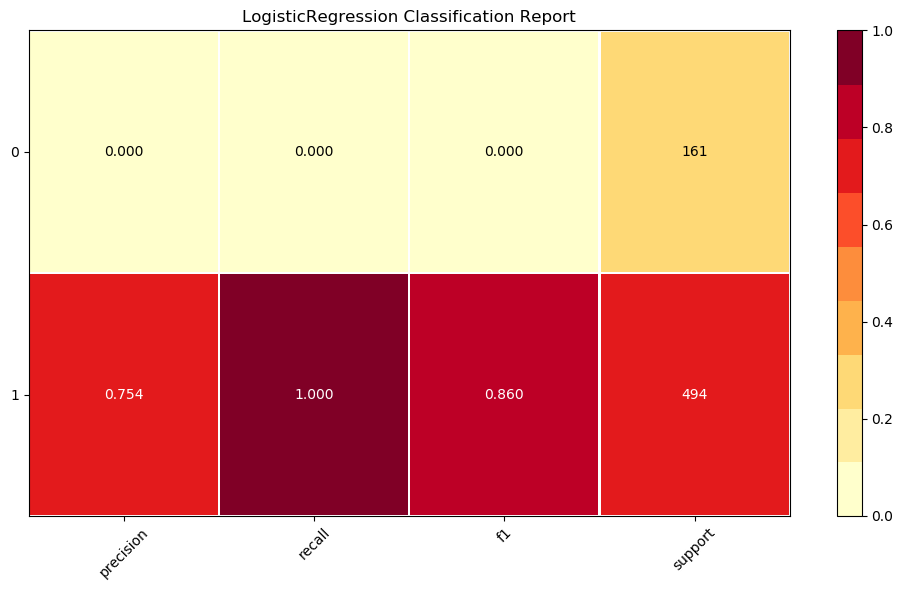

In [236]:
# Instantiate the visualizer
classes = [1, 0]
visualizer = conf_matrix(logreg, X_train, y_train, X_test, y_test, classes = classes, support=True)

### Forest

/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


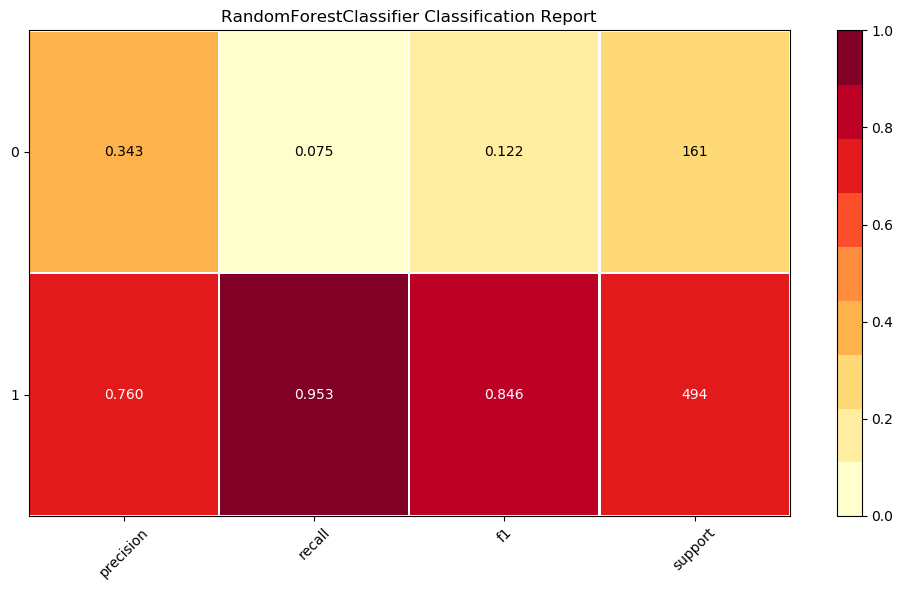

In [238]:
# Instantiate the visualizer
classes = [1, 0]
visualizer = conf_matrix(forest, X_train, y_train, X_test, y_test, classes = classes, support=True)

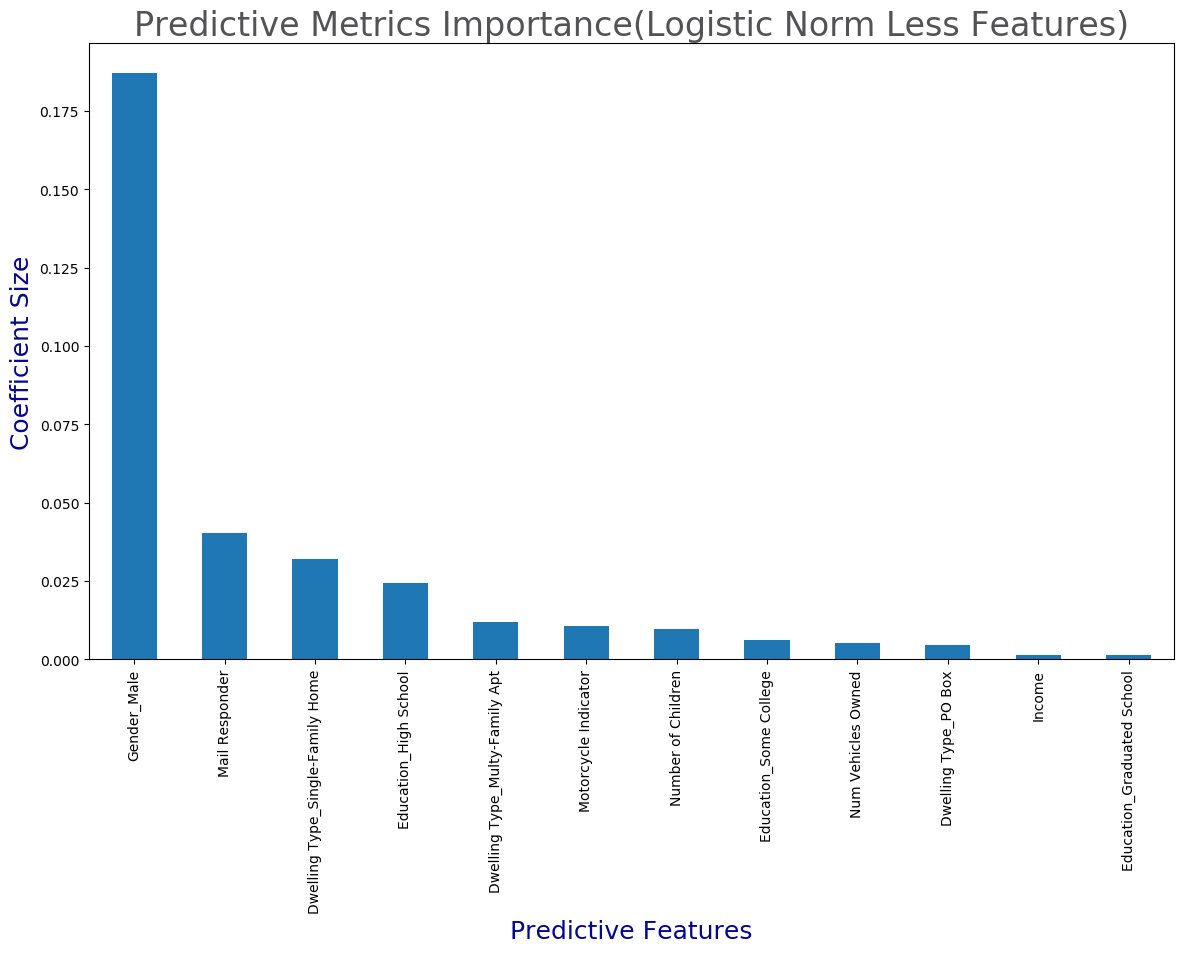

In [242]:
print_coefs(logreg, "Logistic Norm Less Features", num_feat=12)

<function matplotlib.pyplot.show(*args, **kw)>

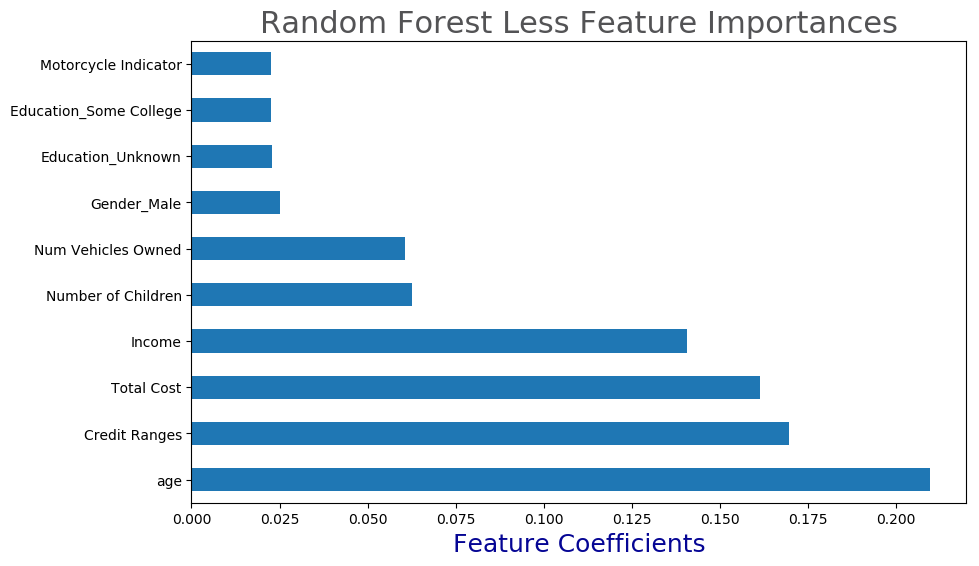

In [240]:
plt.title('Random Forest Less Feature Importances', fontsize = 22, color = "#535355")
plt.xlabel('Feature Coefficients', fontsize = 18, color = "#050594")
# plt.ylabel('Feature Name', fontsize = 18, color = "#050594")
# plt.xticks(rotation=rotation)
pd.Series(forest.feature_importances_, index=X.columns).nlargest(10).plot(kind='barh')
plt.savefig('Random Forest Normal Less Features', bbox_inches = 'tight')
plt.show

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


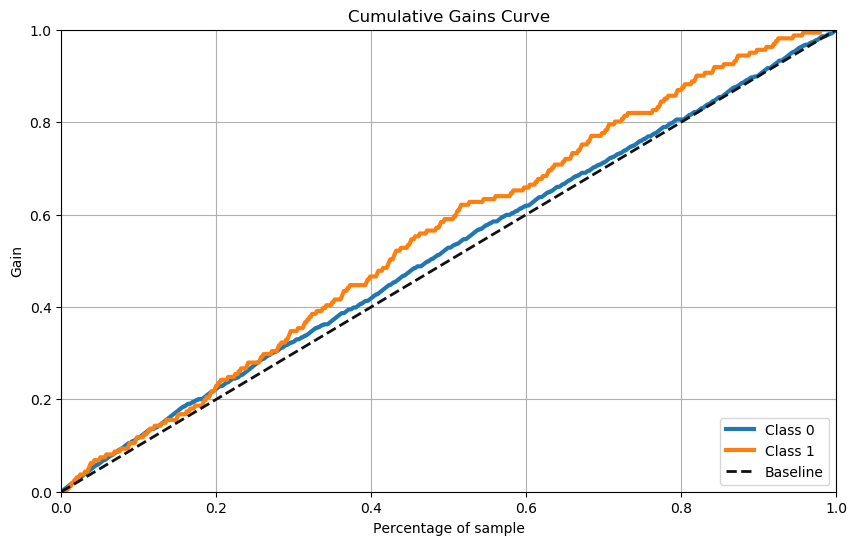

In [243]:
plot_curve(forest)

### Do Same With Scaled

In [244]:
model_df = scaled_df

X = model_df.drop(columns = ['Bought FSV', 'FSV Services Purchased'], axis = 1)
y = model_df['Bought FSV']

#Split Train Test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 18)

#Instantiate Models
logreg = LogisticRegression()
forest = RandomForestClassifier()

#Fit Data To Models
logreg.fit(X_train, y_train)
forest.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [246]:
y_true = y_test
y_pred = logreg.predict(X_test)
target_names = [1,0]
print(classification_report(y_true, y_pred, target_names))

              precision    recall  f1-score   support

           1       0.33      0.01      0.01       161
           0       0.75      1.00      0.86       494

    accuracy                           0.75       655
   macro avg       0.54      0.50      0.44       655
weighted avg       0.65      0.75      0.65       655



In [247]:
y_true = y_test
y_pred = forest.predict(X_test)
target_names = [1,0]
print(classification_report(y_true, y_pred, target_names))

              precision    recall  f1-score   support

           1       0.38      0.09      0.15       161
           0       0.76      0.95      0.85       494

    accuracy                           0.74       655
   macro avg       0.57      0.52      0.50       655
weighted avg       0.67      0.74      0.67       655



/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


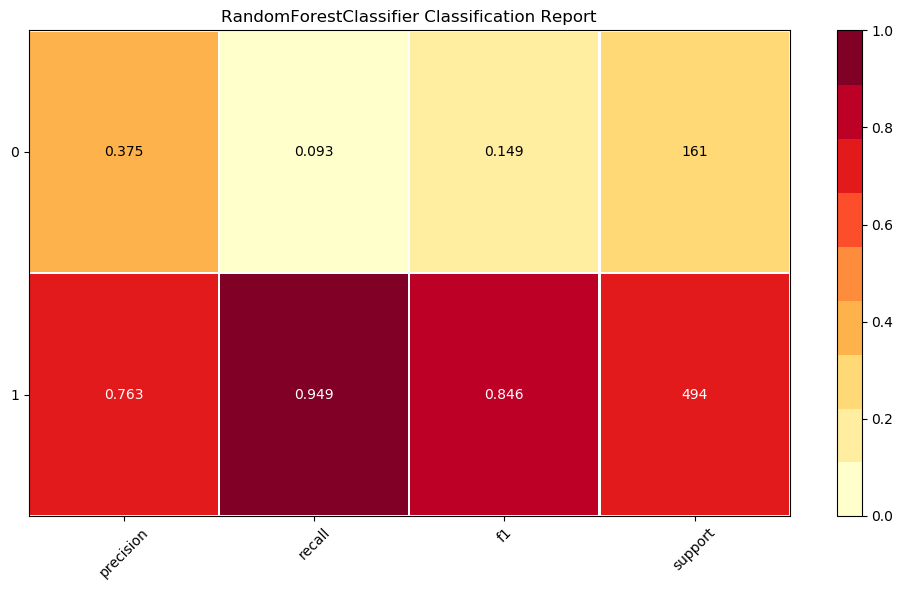

In [248]:
# Instantiate the visualizer
classes = [1, 0]
visualizer = conf_matrix(forest, X_train, y_train, X_test, y_test, classes = classes, support=True)

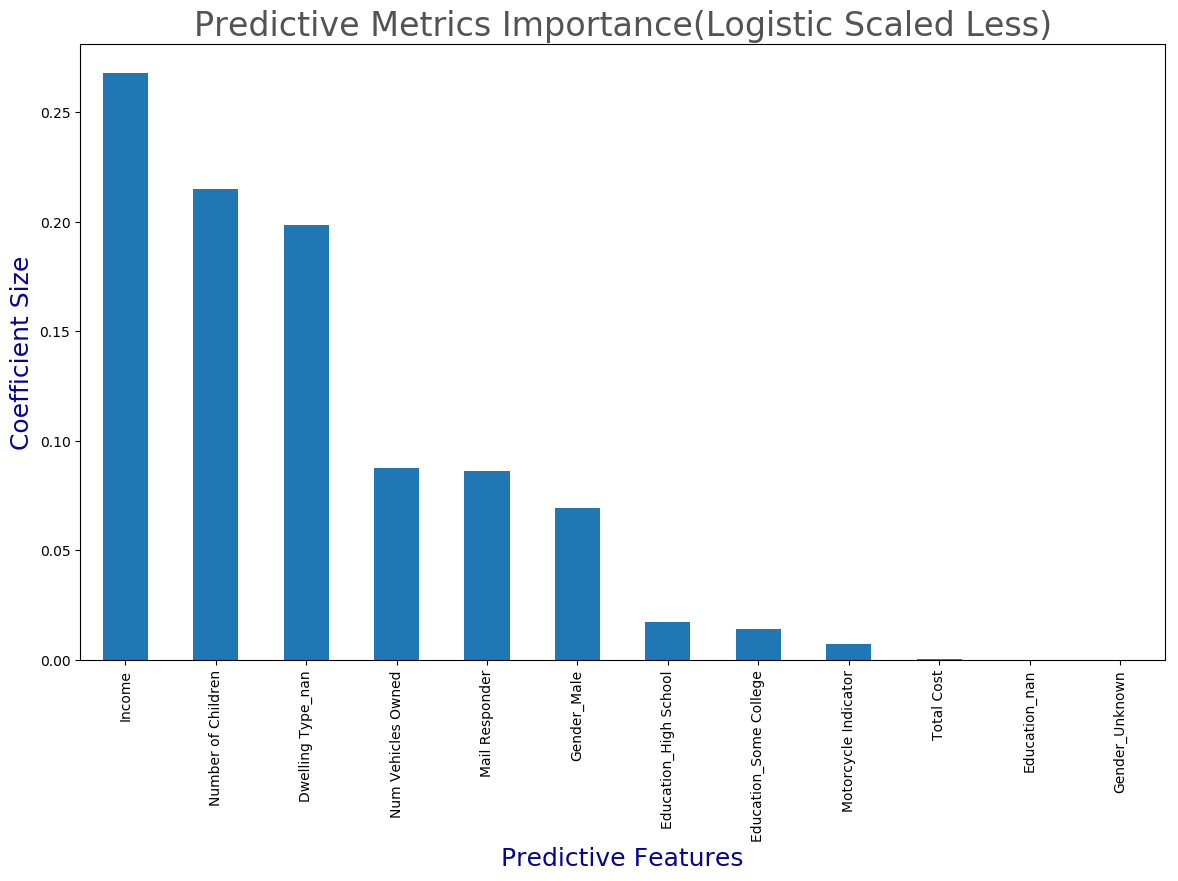

In [249]:
print_coefs(logreg, "Logistic Scaled Less", num_feat=12)

<function matplotlib.pyplot.show(*args, **kw)>

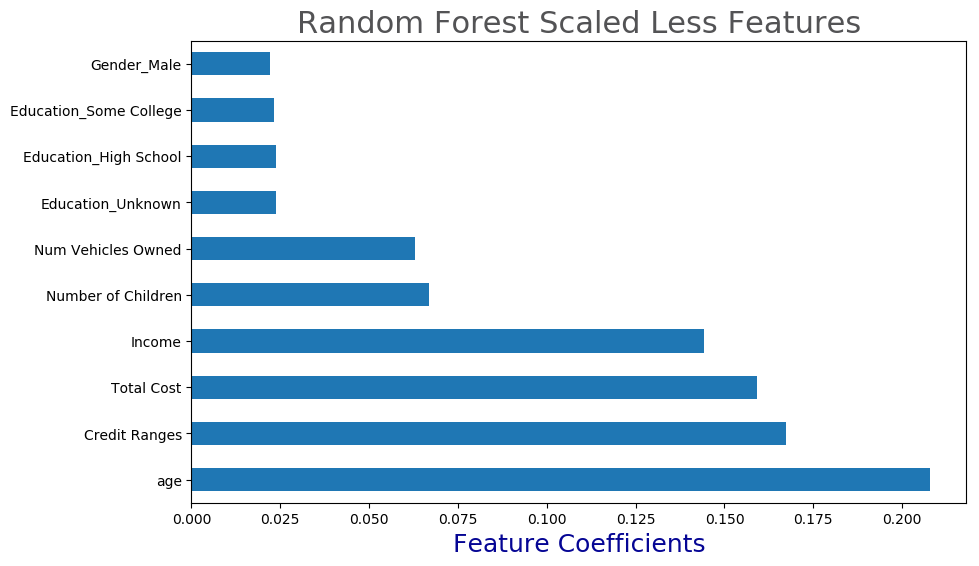

In [250]:
plt.title('Random Forest Scaled Less Features', fontsize = 22, color = "#535355")
plt.xlabel('Feature Coefficients', fontsize = 18, color = "#050594")
# plt.ylabel('Feature Name', fontsize = 18, color = "#050594")
# plt.xticks(rotation=rotation)
pd.Series(forest.feature_importances_, index=X.columns).nlargest(10).plot(kind='barh')
plt.savefig('Random Forest Scaled Less Features', bbox_inches = 'tight')
plt.show

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


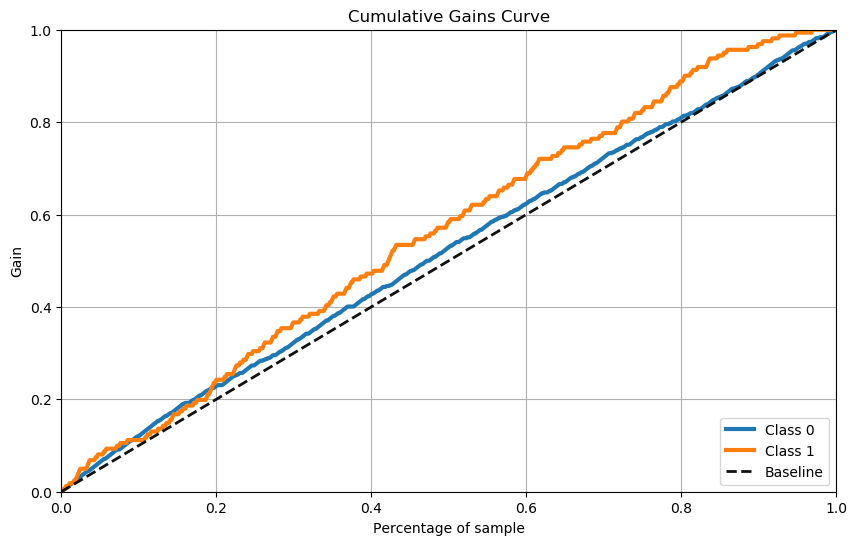

In [251]:
plot_curve(forest)

### Try SMOTE

In [252]:
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
logreg.fit(X_train, y_train)
forest.fit(X_train, y_train)
np.bincount(y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([1914, 1914])

In [253]:
y_true = y_test
y_pred = logreg.predict(X_test)
target_names = [1,0]
print(classification_report(y_true, y_pred, target_names))

              precision    recall  f1-score   support

           1       0.29      0.38      0.33       161
           0       0.78      0.70      0.73       494

    accuracy                           0.62       655
   macro avg       0.53      0.54      0.53       655
weighted avg       0.66      0.62      0.64       655



In [254]:
y_true = y_test
y_pred = forest.predict(X_test)
target_names = [1,0]
print(classification_report(y_true, y_pred, target_names))

              precision    recall  f1-score   support

           1       0.29      0.18      0.22       161
           0       0.76      0.86      0.81       494

    accuracy                           0.69       655
   macro avg       0.53      0.52      0.51       655
weighted avg       0.65      0.69      0.66       655



### Try Downsample

In [255]:
model_df = scaled_df

X = model_df.drop(columns = ['Bought FSV', 'FSV Services Purchased'], axis = 1)
y = model_df['Bought FSV']

#Split Train Test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 18)

#Instantiate Models
logreg = LogisticRegression()
forest = RandomForestClassifier()

In [257]:
nr = NearMiss()
X_train, y_train = nr.fit_sample(X_train, y_train)
logreg.fit(X_train, y_train)
forest.fit(X_train, y_train)
np.bincount(y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([704, 704])

In [258]:
y_true = y_test
y_pred = logreg.predict(X_test)
target_names = [1,0]
print(classification_report(y_true, y_pred, target_names))

              precision    recall  f1-score   support

           1       0.28      0.71      0.41       161
           0       0.82      0.41      0.55       494

    accuracy                           0.49       655
   macro avg       0.55      0.56      0.48       655
weighted avg       0.68      0.49      0.51       655



In [259]:
y_true = y_test
y_pred = forest.predict(X_test)
target_names = [1,0]
print(classification_report(y_true, y_pred, target_names))

              precision    recall  f1-score   support

           1       0.27      0.76      0.40       161
           0       0.81      0.33      0.46       494

    accuracy                           0.43       655
   macro avg       0.54      0.54      0.43       655
weighted avg       0.68      0.43      0.45       655

